# A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION

<img src='https://media.licdn.com/dms/image/C5612AQHRzhae1eG8BA/article-cover_image-shrink_720_1280/0/1563369277306?e=1727308800&v=beta&t=8mDpKbstR-Ia4Dp60relGXZEETYxH8s8U1wKkr0t18M'>

## Bu projede;
Yaşa ve nesile göre online olma tarihlerini bir data scient bakış açısıyla değerlendireceğiz.

*  Flört profiliniz yaşınızı tahmin edebilir mi?
*  Flört profiliniz ait olduğunuz kuşağı tahmin edebiliyor mu? (Millennial, Gen X-er veya Boomers) 
* Arkadaşlık platformu OKCupid'den yaklaşık 60.000 anonimleştirilmiş girişten oluşan bir veri kümesi kullanarak, yukarıdaki soruları machine learning tekniklerini kullanarak keşfedecekğiz.
İlk soruyu ele almak için regresyon tekniklerini, ikinci soruyu ele almak için ise sınıflandırma modellerini kullanacağız.

## Regression &  Classification

* İlk soru, kişinin dating profilinden yaşını tahmin etmeye yönelik olduğu için bu regresyon problemidir.

* İkinci soru kişinin dating profilinden hangi kuşağa (Millenial, Gen X, Boomer) ait olduğunu tahmin etmeye yönelik olduğu için de bir Classification problemidir.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split 
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  #p2(başarı oranını gösterir)

from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB



import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns',100)

In [2]:
df=pd.read_csv('profiles.csv')

In [3]:
df.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


In [4]:
df.shape

(60552, 31)

In [5]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [6]:
# Sütun Karşılaştırması ile Duplicate Bulma
duplicate_rows = df.duplicated()
print(f"Sütun Karşılaştırması ile {sum(duplicate_rows)} adet duplicate satır tespit edildi.")

Sütun Karşılaştırması ile 51037 adet duplicate satır tespit edildi.


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()
# duplicated veri kaldırıldı

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9515 entries, 0 to 9514
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job        

In [10]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks          503
drugs          2300
education      1056
essay0          848
essay1         1168
essay2         1466
essay3         1825
essay4         1636
essay5         1701
essay6         2163
essay7         1962
essay8         3154
essay9         1961
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               1
sign           1739
smokes          919
speaks            7
status            1
dtype: int64

# <font color=darkblue>DATA VISUALIZATION & FEATURE ENGINEERING</font>

([0, 1, 2, 3, 4],
 [Text(0, 0, 'sometimes'),
  Text(1, 0, 'no'),
  Text(2, 0, 'when drinking'),
  Text(3, 0, 'yes'),
  Text(4, 0, 'trying to quit')])

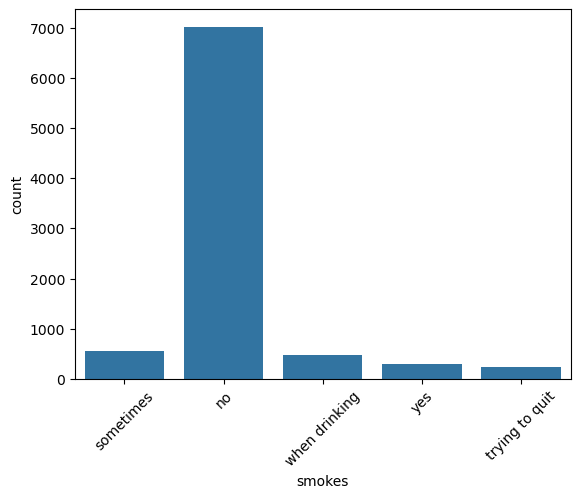

In [11]:
sns.countplot(x=df['smokes'])
plt.xticks(rotation=45)

In [12]:
num_nan = df['smokes'].isna().sum()
print(f"'smokes' sütunundaki NaN değerlerin sayısı: {num_nan}")

'smokes' sütunundaki NaN değerlerin sayısı: 919


In [13]:
df['smokes'] = df['smokes'].fillna(0)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'sometimes'),
  Text(1, 0, 'no'),
  Text(2, 0, '0'),
  Text(3, 0, 'when drinking'),
  Text(4, 0, 'yes'),
  Text(5, 0, 'trying to quit')])

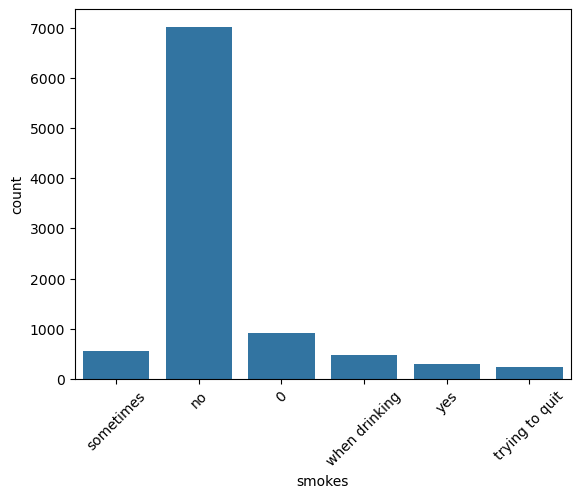

In [14]:
sns.countplot(x=df['smokes'])
plt.xticks(rotation=45)

In [15]:
# sigara içen ve içmeyen olarak iki sınıf yapalım

In [16]:
df['smokes'] = df['smokes'].apply(lambda x: 'yes' if x != 'no' else 'no')

([0, 1], [Text(0, 0, 'yes'), Text(1, 0, 'no')])

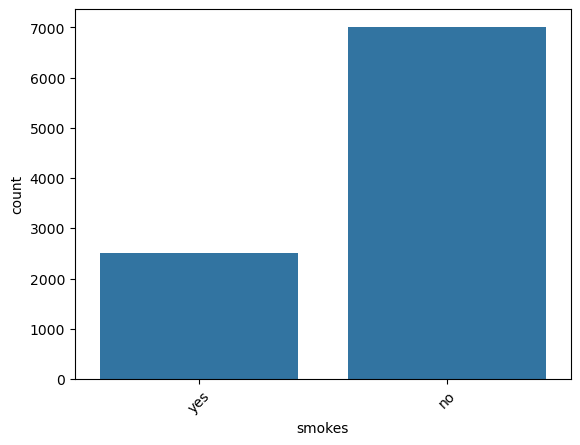

In [17]:
sns.countplot(x=df['smokes'])
plt.xticks(rotation=45)            
#no harici olanları yes adı altında topladım

In [18]:
df['smokes']=df['smokes'].map({'no':0, 'yes':1})

In [19]:
df['sex'].value_counts()

sex
m    5675
f    3839
Name: count, dtype: int64

In [20]:
num_nan = df['sex'].isna().sum()
print(f"'sex' sütunundaki NaN değerlerin sayısı: {num_nan}")

'sex' sütunundaki NaN değerlerin sayısı: 1


In [21]:
df.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'], axis=1, inplace=True)

In [22]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [23]:
df['sex']=df['sex'].map({'m':0, 'f':1})

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

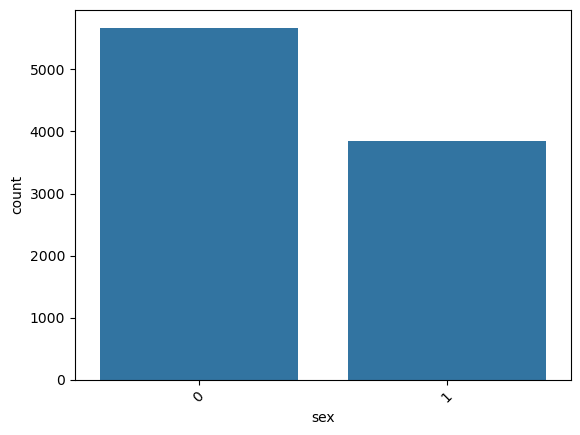

In [24]:
sns.countplot(x=df['sex'])
plt.xticks(rotation=45) 

In [25]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks          503
drugs          2300
education      1056
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               0
sign           1739
smokes            0
speaks            7
status            1
dtype: int64

In [26]:
df['education'].value_counts()

education
graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters p

In [27]:
df.loc[df['education'].isin(['graduated from college/university', 'graduated from masters program','graduated from two-year college','graduated from high schol','graduated from ph.d program','graduated from high school','graduated from law school','graduated from space camp','graduated from med school','two-year college']), 'education'] = 'graduated'
df.loc[df['education'].isin(['working on college/university', 'working on masters program','college/university','working on space camp','working on law school','working on med school','space camp','working on two-year college','working on ph.d program','working on high school','working on space camp','masters program','high school','ph.d program','law school']), 'education'] = 'student'
df.loc[df['education'].isin(['dropped out of space camp', 'dropped out of space camp','dropped out of two-year college','dropped out of ph.d program ','dropped out of masters program','dropped out of college/university','dropped out of ph.d program','dropped out of high school','dropped out of law school','dropped out of med school']), 'education'] = 'dropped'

In [28]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [29]:
df['education']=df['education'].map({'dropped':0, 'student':1, 'graduated':2})

<Axes: xlabel='education'>

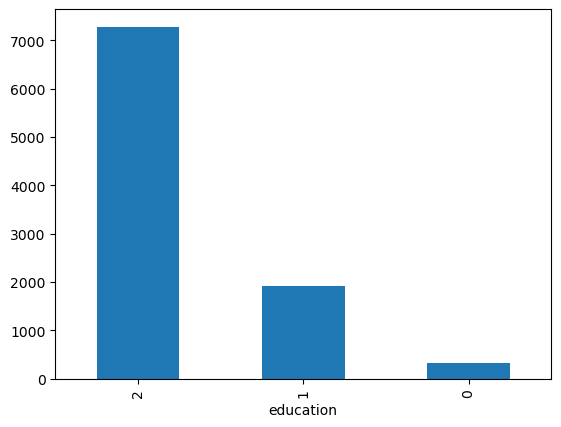

In [30]:
df["education"].value_counts().plot.bar()    

In [31]:
df.isnull().sum()

age               1
body_type       849
diet           3754
drinks          503
drugs          2300
education         0
ethnicity       950
height            1
income            1
job            1332
last_online       1
location          1
offspring      5629
orientation       1
pets           3163
religion       3254
sex               0
sign           1739
smokes            0
speaks            7
status            1
dtype: int64

In [32]:
df['job'].value_counts()

job
other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: count, dtype: int64

In [33]:
df.loc[df['job'].isin(['other','science / tech / engineering','computer / hardware / software','sales / marketing / biz dev','artistic / musical / writer','medicine / health','education / academia','executive / management','banking / financial / real estate','entertainment / media','law / legal services','hospitality / travel','construction / craftsmanship','political / government','clerical / administrative','transportation','military']), 'job'] = 'working'
df.loc[df['job'].isin(['rather not say','unemployed','dropped','student']), 'job'] = 'unemployed'
df.loc[df['job'].isin(['retired']), 'job'] = 'retired'

In [34]:
df['job'] = df['job'].fillna(df['job'].mode()[0])

In [35]:
df['job']=df['job'].map({'unemployed':0, 'retired':1, 'working':2})

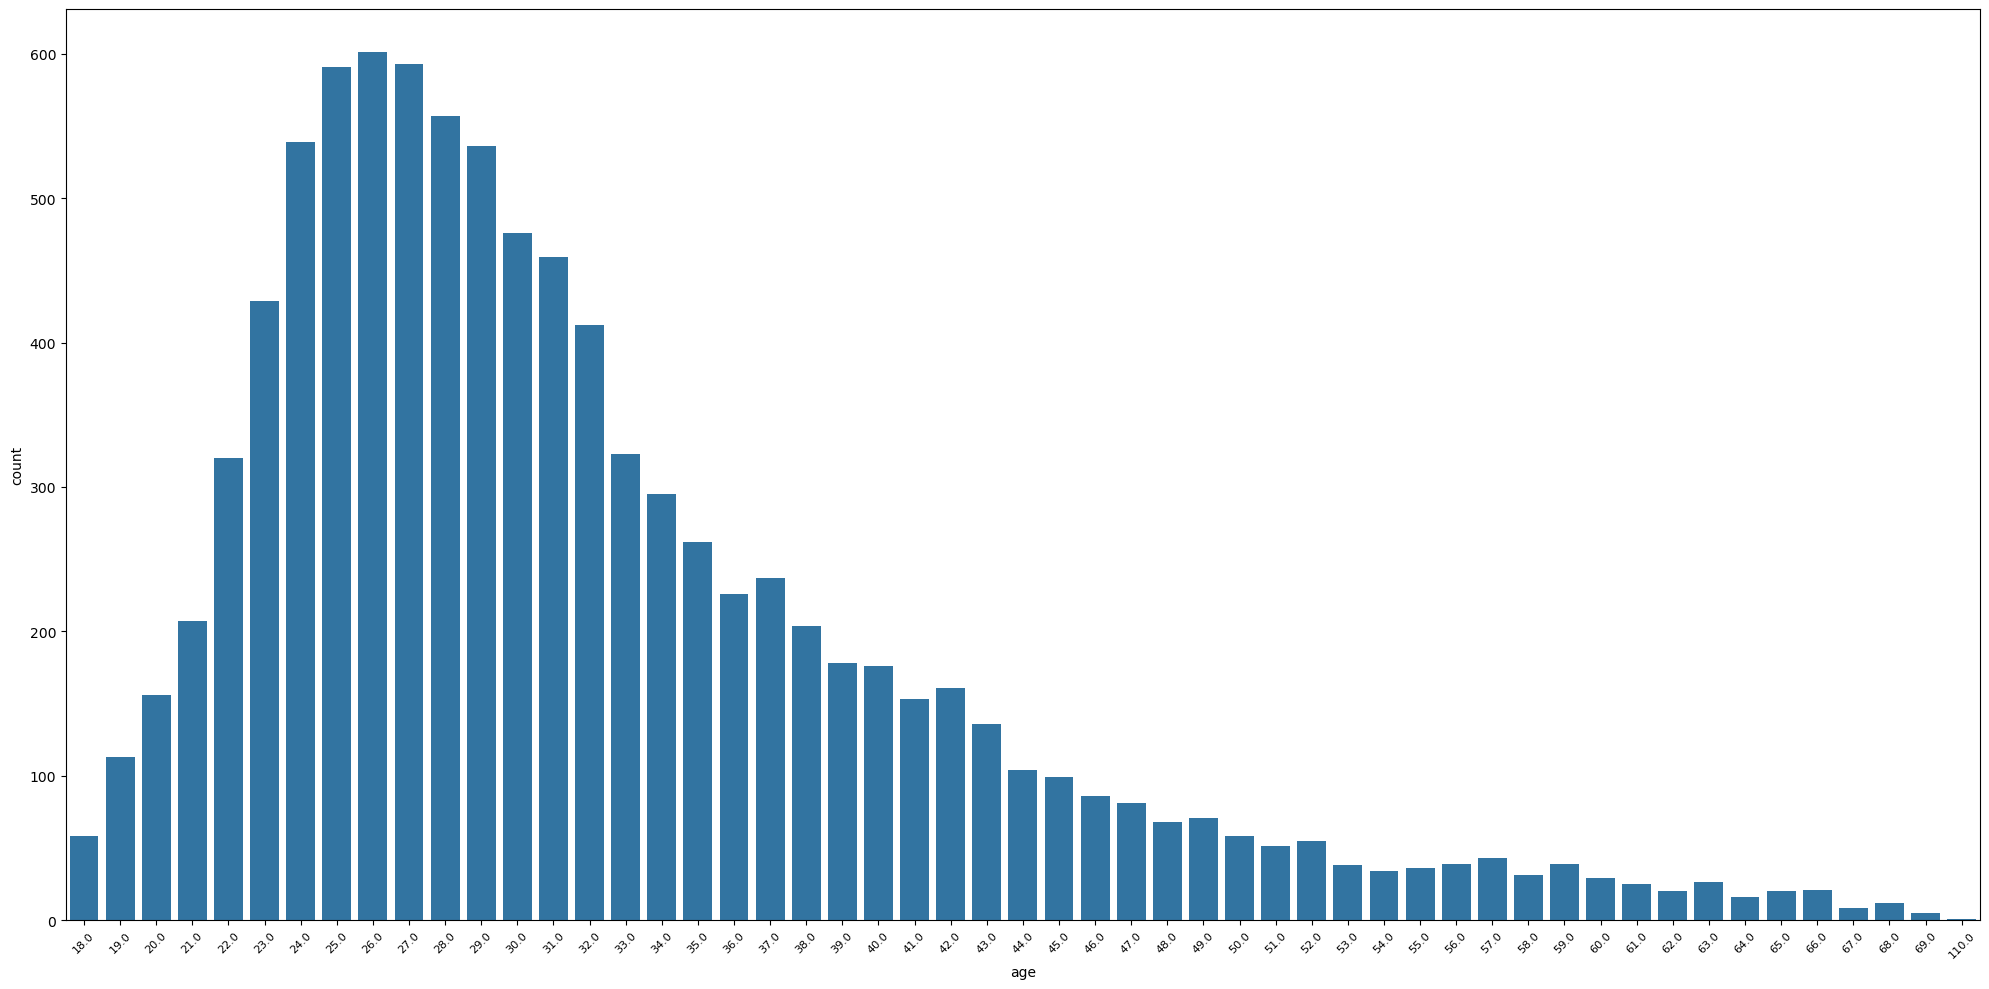

In [36]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['age'])
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

In [37]:
df['age'] = df['age'].fillna(df['age'].mode()[0])

In [38]:
df['age'].min(),df['age'].max(),df['age'].std(),df['age'].var(),df['age'].mean(),

(18.0, 110.0, 9.44519711673441, 89.21174857396802, 32.08355228586442)

<Axes: xlabel='age'>

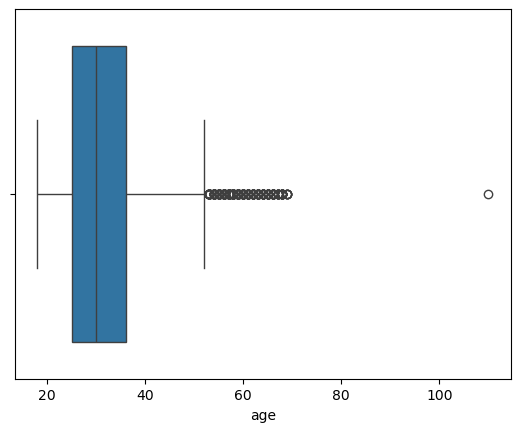

In [39]:
sns.boxplot(x=df['age'])  

In [40]:
# 59 yaşından büyükleri veri setinden çıkar
df = df[df['age'] < 59]

<Axes: xlabel='age'>

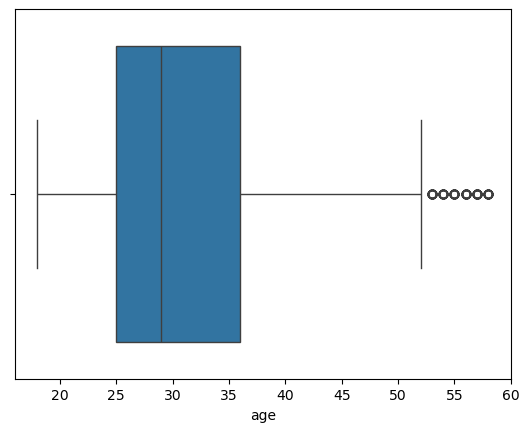

In [41]:
sns.boxplot(x=df['age'])  

In [42]:
df['body_type'].value_counts()

body_type
average           2200
fit               1992
athletic          1864
thin               720
curvy              611
a little extra     413
skinny             268
full figured       172
overweight          68
jacked              64
used up             47
rather not say      37
Name: count, dtype: int64

In [43]:
df['body_type'] = df['body_type'].fillna(df['body_type'].mode()[0])

In [44]:
# body typle fit, bad ve curvy olarak 3ledik

In [45]:
skinnystatus={"average":"fit",
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(skinnystatus,inplace=True)         #kod Enes Assan'dan alındı

([0, 1, 2], [Text(0, 0, 'curvy'), Text(1, 0, 'fit'), Text(2, 0, 'bad')])

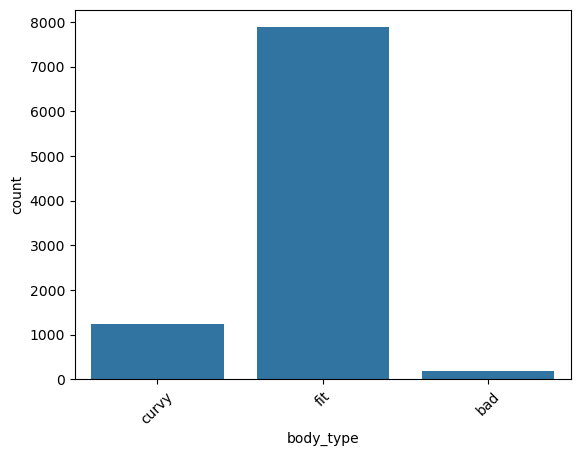

In [46]:
sns.countplot(x=df['body_type'])
plt.xticks(rotation=45)

In [47]:
df['body_type']=df['body_type'].map({'curvy':0, 'bad':1, 'fit':2})

In [48]:
df['income'].value_counts()

income
-1.0          7532
 20000.0       460
 100000.0      233
 80000.0       167
 50000.0       167
 30000.0       158
 40000.0       153
 60000.0       115
 150000.0      108
 70000.0        96
 1000000.0      71
 250000.0       27
 500000.0        5
Name: count, dtype: int64

In [49]:
df['income'] = df['income'].fillna(df['income'].mode()[0])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '-1.0'),
  Text(1, 0, '20000.0'),
  Text(2, 0, '30000.0'),
  Text(3, 0, '40000.0'),
  Text(4, 0, '50000.0'),
  Text(5, 0, '60000.0'),
  Text(6, 0, '70000.0'),
  Text(7, 0, '80000.0'),
  Text(8, 0, '100000.0'),
  Text(9, 0, '150000.0'),
  Text(10, 0, '250000.0'),
  Text(11, 0, '500000.0'),
  Text(12, 0, '1000000.0')])

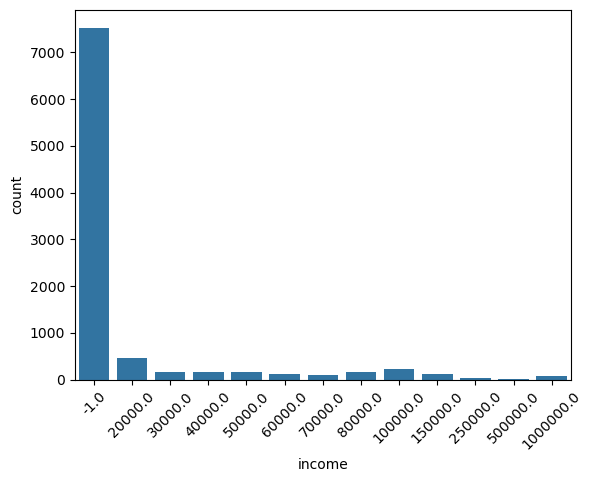

In [50]:
sns.countplot(x=df['income'])
plt.xticks(rotation=45)

In [51]:
df['income'] = df['income'].apply(lambda x: 'rich' if x > 100000 else 'poor')
# income eğer 1500000 den büyükse rich, değilse poor d,ye atadı wealth_status sutununa

([0, 1], [Text(0, 0, 'poor'), Text(1, 0, 'rich')])

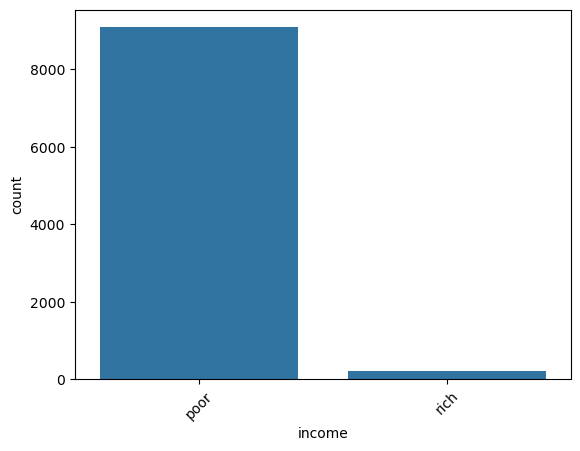

In [52]:
sns.countplot(x=df['income'])
plt.xticks(rotation=45)

In [53]:
df['income']=df['income'].map({'poor':0, 'rich':1})

In [54]:
# 'speaks' sütunundaki tüm değerlerin sayısını göstermek için value_counts() kullanılır
speaks_counts = df['speaks'].value_counts().reset_index()
speaks_counts.columns = ['speaks', 'Count']
# Sonuçlar ekrana yazdırılır
print(speaks_counts)

                                                 speaks  Count
0                                               english   3327
1                                    english (fluently)   1067
2                    english (fluently), spanish (okay)    317
3                  english (fluently), spanish (poorly)    316
4                english (fluently), spanish (fluently)    193
...                                                 ...    ...
1773  english (fluently), spanish (poorly), sanskrit...      1
1774  english (fluently), spanish (poorly), esperant...      1
1775  english (fluently), chinese (poorly), hebrew (...      1
1776         english, french (okay), spanish (fluently)      1
1777  english (fluently), french (okay), swedish (po...      1

[1778 rows x 2 columns]


* burada df nin içindeki speaks sutununu içeriği çok karmaşk geldi,
akıcı ispanyolca ve ingilizce konuşanların çoğunlukta olduğunu gördüm,
lambda koduyla speaks sutunu içindeki verileri categoric tipe dönüştürüp Lang sutununa atadı

In [55]:
df['speaks'] = df['speaks'].fillna(df['speaks'].mode()[0])

In [56]:
df['speaks']=df['speaks'].astype('category')
df['Lang']=df['speaks'].apply(lambda x:len(list(x.split(','))))

In [57]:
del df ['speaks']

([0, 1, 2, 3, 4],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

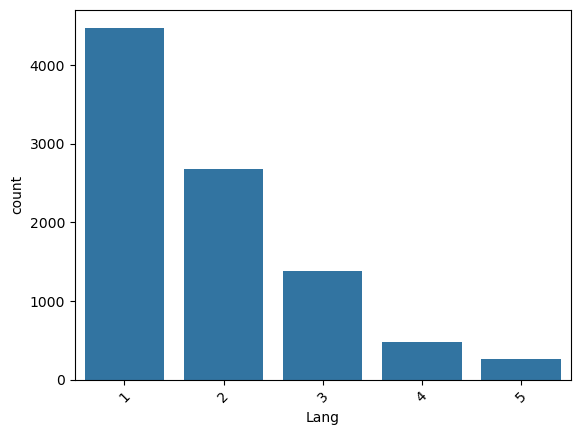

In [58]:
sns.countplot(x=df['Lang'])
plt.xticks(rotation=45)

In [59]:
#age sutununu yaşlara göre generation diye bir sutuna atadım.
df['Generation'] = ''
df.loc[(df['age'] > 17) & (df['age'] < 33), 'Generation'] = 'Millennial'
df.loc[(df['age'] > 32) & (df['age'] < 47), 'Generation'] = 'Gen X-er'
df.loc[(df['age'] > 46) & (df['age'] < 120),  'Generation'] = 'Boomer'

([0, 1, 2],
 [Text(0, 0, 'Millennial'), Text(1, 0, 'Gen X-er'), Text(2, 0, 'Boomer')])

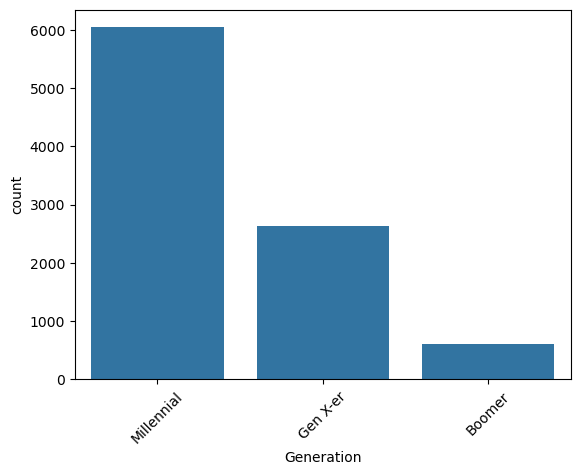

In [60]:
sns.countplot(x=df['Generation'])
plt.xticks(rotation=45)

<Axes: xlabel='age', ylabel='Generation'>

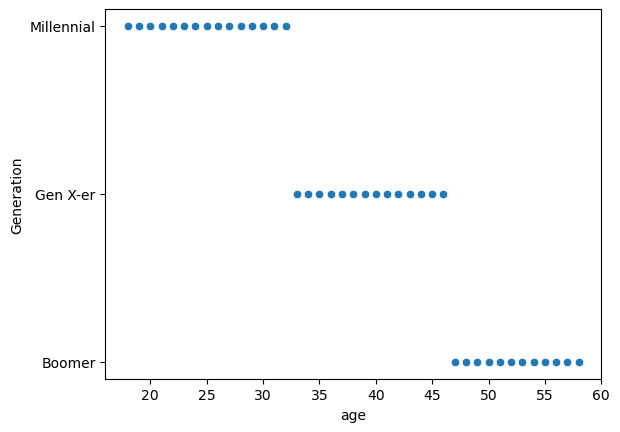

In [61]:
sns.scatterplot(x='age', y='Generation', data=df)

In [62]:
df['Generation'].value_counts()

Generation
Millennial    6048
Gen X-er      2640
Boomer         605
Name: count, dtype: int64

In [63]:
df['Generation']=df['Generation'].replace(['Boomer'],'0')
df['Generation']=df['Generation'].replace(['Gen X-er'],'1')
df['Generation']=df['Generation'].replace(['Millennial'],'2')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9293 entries, 0 to 9514
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9293 non-null   float64
 1   body_type    9293 non-null   int64  
 2   diet         5619 non-null   object 
 3   drinks       8795 non-null   object 
 4   drugs        7010 non-null   object 
 5   education    9293 non-null   int64  
 6   ethnicity    8363 non-null   object 
 7   height       9292 non-null   float64
 8   income       9293 non-null   int64  
 9   job          9293 non-null   int64  
 10  last_online  9292 non-null   object 
 11  location     9292 non-null   object 
 12  offspring    3735 non-null   object 
 13  orientation  9292 non-null   object 
 14  pets         6190 non-null   object 
 15  religion     6086 non-null   object 
 16  sex          9293 non-null   int64  
 17  sign         7610 non-null   object 
 18  smokes       9293 non-null   int64  
 19  status     

In [65]:
df['Generation'] = df['Generation'].replace(['Boomer', 'Gen X-er', 'Millennial'], ['0', '1', '2'])
df['Generation'] = df['Generation'].astype(int)

In [66]:
df['religion'].value_counts()

religion
agnosticism                                   435
other                                         398
agnosticism but not too serious about it      396
agnosticism and laughing about it             382
atheism                                       359
catholicism but not too serious about it      359
atheism and laughing about it                 325
other and laughing about it                   318
christianity but not too serious about it     308
christianity                                  289
other but not too serious about it            231
judaism but not too serious about it          210
atheism but not too serious about it          198
catholicism                                   163
atheism and somewhat serious about it         135
christianity and somewhat serious about it    124
other and somewhat serious about it           116
catholicism and laughing about it             116
judaism and laughing about it                 112
agnosticism and somewhat serious about it

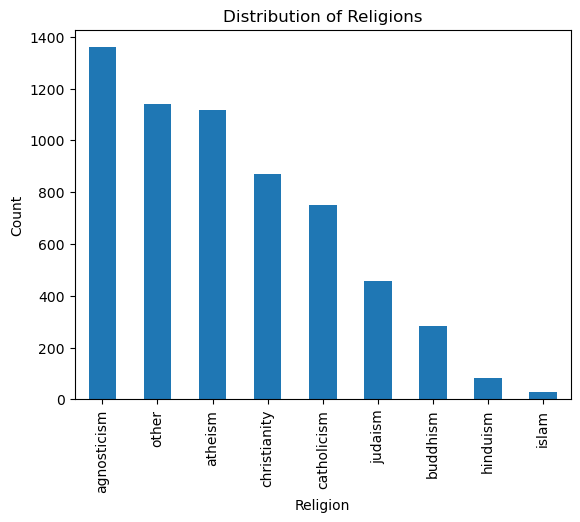

In [67]:
religion_counts = df["religion"].str.split().str[0].value_counts()
religion_counts.plot(kind='bar')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.title('Distribution of Religions')
plt.show()

In [68]:
df=df.drop(["diet","sign","location","religion"], axis=1) 

In [69]:
df['orientation'].value_counts()

orientation
straight    7987
gay          882
bisexual     423
Name: count, dtype: int64

In [70]:
df['orientation']=df['orientation'].map({'bisexual':0, 'gay':1, 'straigh':2})

In [71]:
df['orientation'] = df['orientation'].fillna(0)

In [72]:
df.isnull().sum()

age               0
body_type         0
drinks          498
drugs          2283
education         0
ethnicity       930
height            1
income            0
job               0
last_online       1
offspring      5558
orientation       0
pets           3103
sex               0
smokes            0
status            1
Lang              0
Generation        0
dtype: int64

In [73]:
df['pets'].value_counts()

pets
likes dogs and likes cats          2263
likes dogs                         1131
has dogs                            658
likes dogs and has cats             655
has dogs and likes cats             377
likes dogs and dislikes cats        292
has dogs and has cats               216
has cats                            212
likes cats                          196
has dogs and dislikes cats           81
dislikes dogs and dislikes cats      41
dislikes dogs and likes cats         35
dislikes cats                        18
dislikes dogs and has cats           11
dislikes dogs                         4
Name: count, dtype: int64

In [74]:
# seven ve sevmeyen olarak temize çektik
df['pets']=df['pets'].replace(['likes dogs and likes cats', 'likes dogs', 'has dogs',
             'likes dogs and has cats', 'has dogs and likes cats',
             'likes dogs and dislikes cats', 'has dogs and has cats',
             'has cats', 'likes cats'],'like_animals')
df['pets']=df['pets'].replace(['has dogs and dislikes cats','dislikes dogs and dislikes cats','dislikes cats','dislikes dogs and has cats','dislikes dogs','dislikes dogs and dislikes cats','dislikes dogs and likes cats'],'dislike_animals')

([0, 1], [Text(0, 0, 'like_animals'), Text(1, 0, 'dislike_animals')])

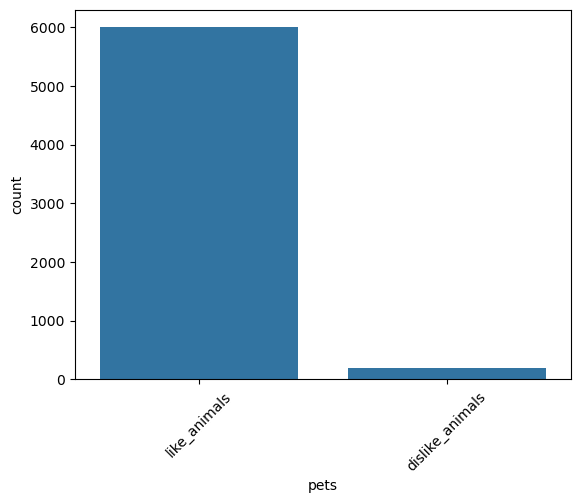

In [75]:
sns.countplot(x=df['pets'])
plt.xticks(rotation=45)

In [76]:
df['pets']=df['pets'].map({'dislike_animals':0, 'like_animals':1})

In [77]:
df['pets'] = df['pets'].fillna(df['pets'].mode()[0])

In [78]:
del df ['ethnicity']

In [79]:
df['drugs'].value_counts()

drugs
never        5784
sometimes    1164
often          62
Name: count, dtype: int64

In [102]:
df.isnull().sum()

age            0
body_type      0
drinks         0
drugs          0
education      0
income         0
job            0
last_online    1
offspring      0
orientation    0
pets           0
sex            0
smokes         0
status         1
Lang           0
Generation     0
dtype: int64

In [96]:
del df['height']

In [82]:
df['drugs'] = df['drugs'].map({'never': 0, 'sometimes': 1, 'often': 2, 'other_value': 3})

In [85]:
df['drugs'] = df['drugs'].map({'never': 0, 'sometimes': 1, 'often': 2}).fillna(df['drugs'])

([0, 1, 2], [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')])

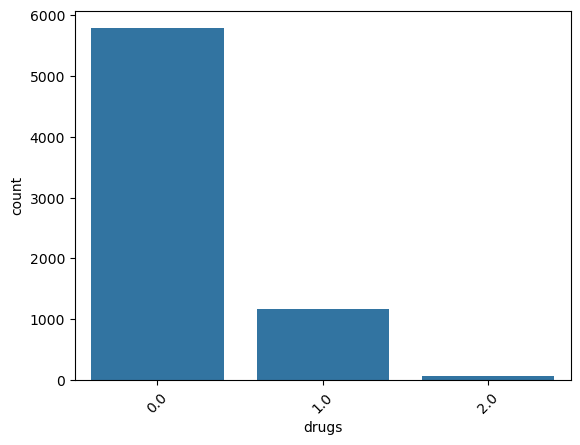

In [86]:
sns.countplot(x=df['drugs'])
plt.xticks(rotation=45)

In [90]:
df['offspring'].value_counts()

offspring
doesn&rsquo;t have kids                                1212
doesn&rsquo;t have kids, but might want them            617
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 436
has a kid                                               271
has kids                                                234
doesn&rsquo;t have kids, and doesn&rsquo;t want any     166
has kids, but doesn&rsquo;t want more                    55
has a kid, and might want more                           35
has a kid, but doesn&rsquo;t want more                   34
wants kids                                               29
might want kids                                          28
has kids, and might want more                            23
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: count, dtype: int64

In [91]:
df.loc[df['offspring'].isin(['doesn&rsquo;t have kids','doesn&rsquo;t have kids, but might want them','doesn&rsquo;t have kids, but wants them','doesn&rsquo;t want kids','doesn&rsquo;t have kids, and doesn&rsquo;t want any','might want kids']), 'offspring'] = 'no'
df.loc[df['offspring'].isin(['has a kid','has kids','has kids, but doesn&rsquo;t want more','wants kids','has a kid, and wants more','has kids, and might want more','has kids, and wants more','has a kid, but doesn&rsquo;t want more','has kids, but doesn&rsquo;t want more','has a kid, and might want more']), 'offspring'] = 'yes'

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

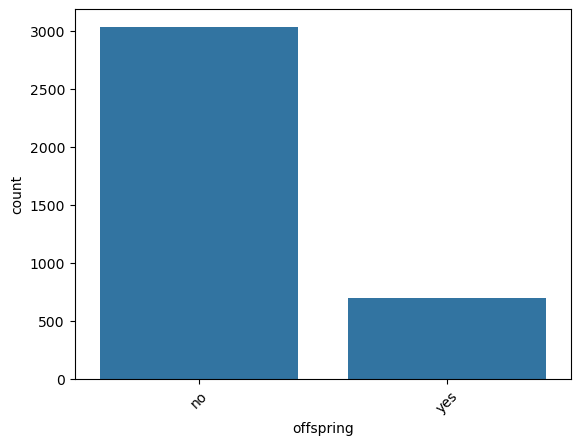

In [92]:
sns.countplot(x=df['offspring'])
plt.xticks(rotation=45)

In [93]:
df['offspring']=df['offspring'].map({'no':0, 'yes':1})

In [94]:
df['offspring'] = df['offspring'].fillna(0)

In [98]:
df['drinks'].value_counts()

drinks
socially       6531
rarely          876
often           802
not at all      482
very often       54
desperately      50
Name: count, dtype: int64

In [99]:
df.loc[df['drinks'].isin(['rarely','not at all','often']), 'drinks'] = 'no'
df.loc[df['drinks'].isin(['socially','very often','desperately']), 'drinks'] = 'yes'

In [100]:
df['drinks']=df['drinks'].map({'no':0, 'yes':1})

In [101]:
df['drinks'] = df['drinks'].fillna(0)

In [103]:
df['status'].value_counts()

status
single            8696
seeing someone     288
available          264
married             44
Name: count, dtype: int64

In [104]:
df.loc[df['status'].isin(['single','seeing someone','available']), 'status'] = 'single'
df.loc[df['status'].isin(['married']), 'status'] = 'married'

In [105]:
df['status']=df['status'].map({'single':0, 'married':1})

In [106]:
df['status'] = df['status'].fillna(0)

In [108]:
# Önce 'last_online' sütunundaki verileri doğru şekilde ayrıştırma
df['last_online'] = df['last_online'].str.split('-').str[0]

In [109]:
# 'last_online' sütununu tarih formatına dönüştürme
df['last_online'] = pd.to_datetime(df['last_online'])

# Sadece yıl kısmını alma
df['last_online'] = df['last_online'].dt.year

# Medyan hesaplaması
df['last_online'] = df['last_online'].fillna(df['last_online'].median())

In [110]:
df.isnull().sum()

age            0
body_type      0
drinks         0
drugs          0
education      0
income         0
job            0
last_online    0
offspring      0
orientation    0
pets           0
sex            0
smokes         0
status         0
Lang           0
Generation     0
dtype: int64

* Tüm dataya feature engineering yapıldı, boşlukları da lineer regressionla doldurayım dediğimde şu kod hata verdi

In [111]:
df.to_pickle('profilesss_data.pkl')
# auto ml için kaydet

# <font color=darkblue>MODELING REGRESSION</font>

* Can your date predict your age?

In [112]:
abs(df.corr(numeric_only=True)['age'].sort_values(ascending=False))

age            1.000000
offspring      0.352759
job            0.236516
education      0.193065
income         0.042379
status         0.040719
sex            0.020817
last_online    0.018107
pets           0.004165
Lang           0.011122
orientation    0.014667
drinks         0.025901
body_type      0.039410
drugs          0.119941
smokes         0.157089
Generation     0.900256
Name: age, dtype: float64

<Axes: >

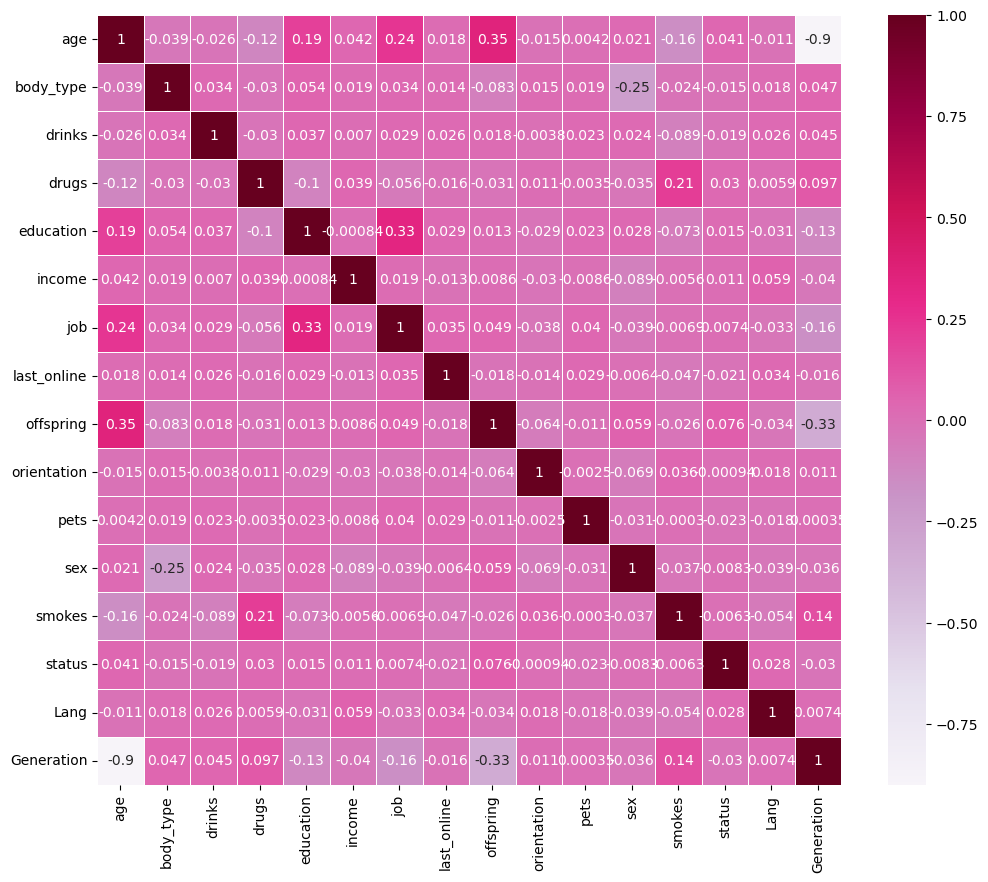

In [113]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='PuRd', linewidths=0.5)

In [114]:
x=df.drop('age',axis=1)  
y=df[['age']]

In [115]:
#!pip install xgboost

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [117]:
algo_test(x, y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.330904e-01,3.355968e+00,2.791506e+00
KNeighborsRegressor,8.293586e-01,3.393277e+00,2.842609e+00
Linear,8.285251e-01,3.401554e+00,2.818924e+00
Ridge,8.285230e-01,3.401575e+00,2.818848e+00
XGBRegressor,8.135713e-01,3.546773e+00,2.891515e+00
mlp_regressor,8.129298e-01,3.552870e+00,2.937991e+00
Decision Tree,7.786788e-01,3.864458e+00,3.121062e+00
Extra Tree,7.760343e-01,3.887477e+00,3.134447e+00
AdaBoost,7.752538e-01,3.894245e+00,3.123830e+00
Lasso,7.671875e-01,3.963513e+00,3.226146e+00


* GB %83 ile iyi bir performans gösterdi, modelimiz başarılı oldu.

# <font color=darkblue>MODELING CLASSIFICATION</font>

* Can your date predict your generations?

In [119]:
x=df.drop('Generation',axis=1)  
y=df[['Generation']]

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)


In [121]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[  15   43  115]
 [  16  104  703]
 [   2   38 1752]]
LogisticRegression()  modeli eğitiliyor!..
[[ 173    0    0]
 [   0  823    0]
 [   0    0 1792]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[ 173    0    0]
 [   0  823    0]
 [   0    0 1792]]
RandomForestClassifier()  modeli eğitiliyor!..
[[ 173    0    0]
 [   0  823    0]
 [   0    0 1792]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[ 173    0    0]
 [   0  823    0]
 [   0    0 1792]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[ 173    0    0]
 [   0  819    4]
 [   0    1 1791]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[ 173    0    0]
 [   0  823    0]
 [   0    0 1792]]
MultinomialNB()  modeli eğitiliyor!..
[[ 119   54    0]
 [   4  643  176]
 [   0   11 1781]]
Eğitim tamamlandı.
En başarılı model:  LogisticRegression
Confusion Matrix:
[[ 173    0    0]
 [   0  823    0]
 [   0    0 1792]]
classification Report:
              precision

,Accuracy,Precision,Recall,F1
LogisticRegression,1.000000,1.000000,1.000000,1.000000
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
KNeighborsClassifier,0.998207,0.998207,0.998207,0.998207
MultinomialNB,0.912123,0.912123,0.912123,0.912123
BernoulliNB,0.671090,0.671090,0.671090,0.671090


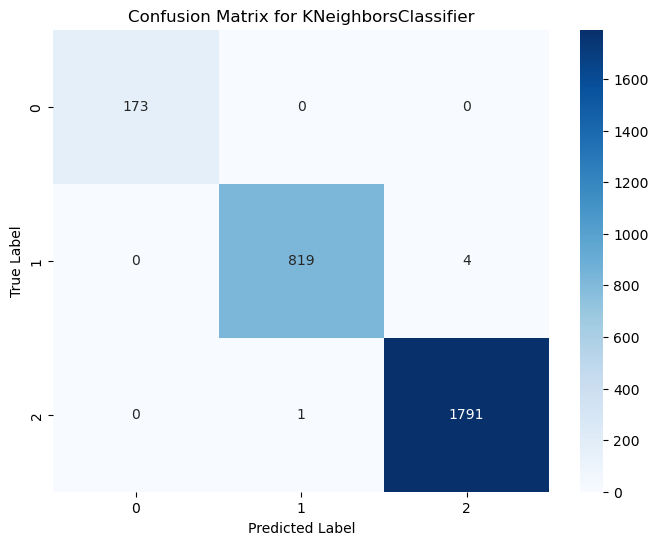

In [122]:
confusion_matrix = [[173, 0, 0], 
                   [0, 819, 4],
                   [0, 1, 1791]]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix for KNeighborsClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

* Confusion Matrix 1. ve 3. sınıf için hiç yanlış tahmin yapmamış false negative 0, 2. sınıf sadece 4 false negative, model başarılı.